In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadok2.xlsx'
data = pd.read_excel(file_path)
#data = pd.read_excel('c:\andre\consolidado.xlsx', sheet_name='Sheet1')

# Assuming the last column is the target/output column
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadof1.xlsx'
data = pd.read_excel(file_path)

# Assuming the last column is the target/output column
X2 = data.iloc[:, :-1]  # Features (all columns except the last one)
y2 = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

In [70]:
mlp = MLPClassifier(random_state=42)

# Definir a grade de parâmetros para otimização
param_grid = {
    'hidden_layer_sizes': [(10,),(20,), (10,5), (10,10), (20,10), (20,20), (30,20)],
    'activation': ['relu', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.001, 0.0001],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500]
}

# Configurar o GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, scoring='accuracy')

# Executar o ajuste de parâmetros
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e a melhor acurácia obtida
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_:.2f}")

# Avaliar o modelo com os melhores parâmetros no conjunto de teste
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Melhores parâmetros: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (30, 20), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Melhor acurácia: 0.87
Acurácia no conjunto de teste: 0.87


C:\Users\Andre\AppData\Local\Temp\ipykernel_29896\125633374.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


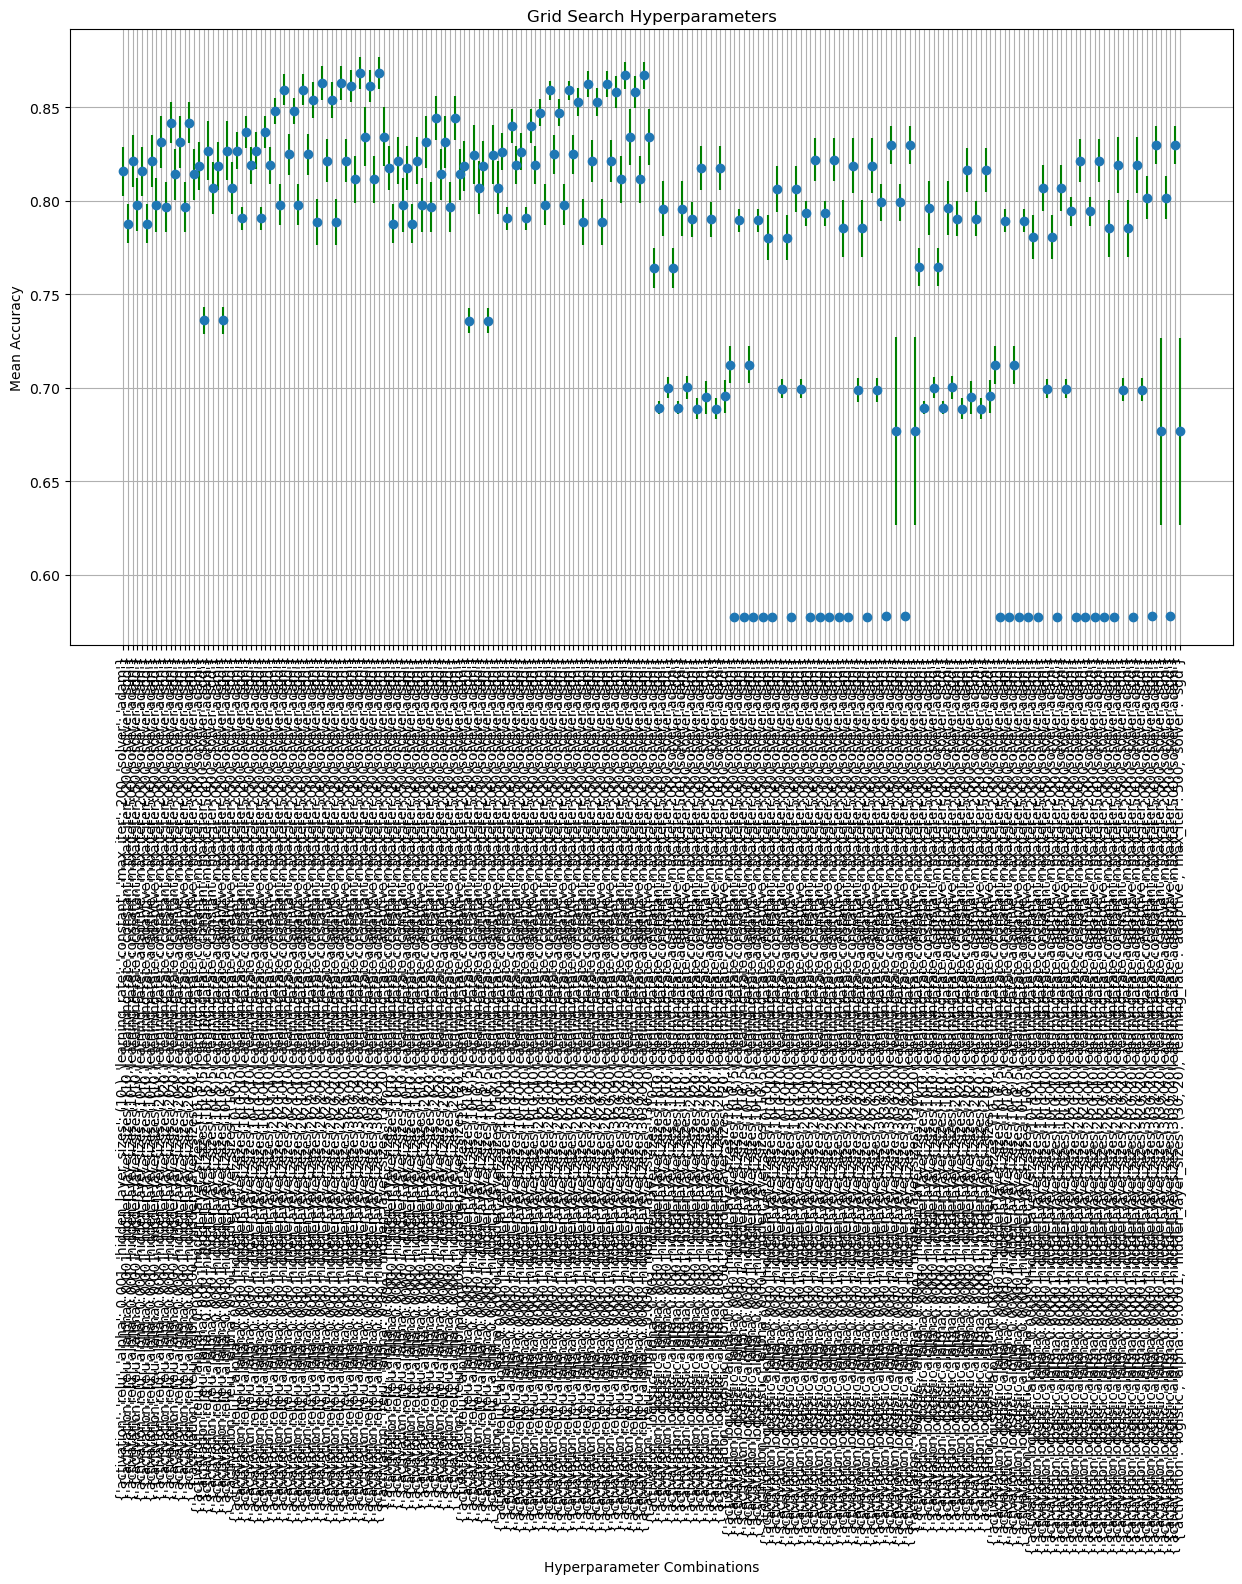

In [71]:
import matplotlib.pyplot as plt

# Extract results
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

# Prepare data for plotting
param_combinations = [str(p) for p in params]

# Plot the results
plt.figure(figsize=(15, 8))
plt.errorbar(param_combinations, means, yerr=stds, fmt='o', ecolor='g', capthick=2)
plt.title('Grid Search Hyperparameters')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Mean Accuracy')
plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\conda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum itera

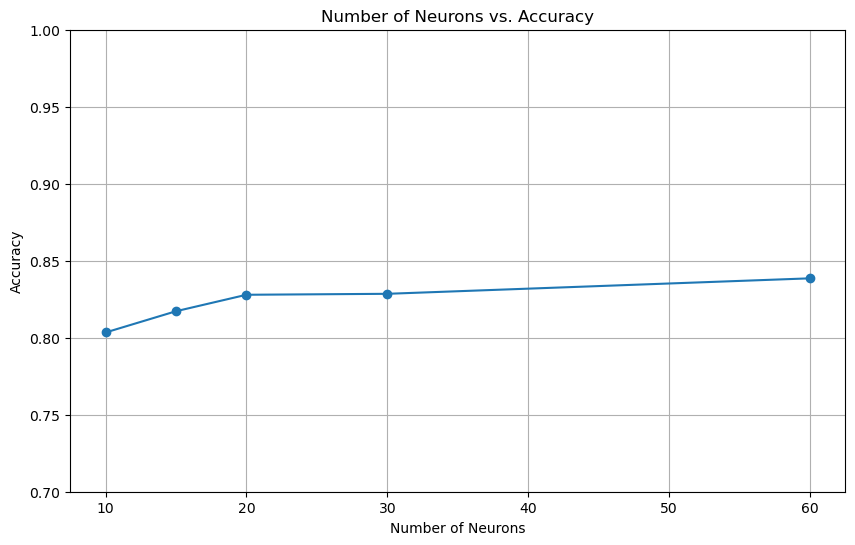

In [72]:
neuron_numbers = [10,15,20,30,60]
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

# Dummy data: replace with your actual data

accuracies = []

for neurons in neuron_numbers:
    mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(neurons,20),
    max_iter=500,
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='constant',
    random_state=42
)
    cv_scores = cross_val_score(mlp_classifier, X_test, y_test, cv=3, scoring='accuracy')
    accuracies.append(cv_scores.mean())

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(neuron_numbers, accuracies, marker='o')
plt.ylim(0.7, 1)

plt.title('Number of Neurons vs. Accuracy')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


In [3]:
# Define the MLPClassifier
#mlp_classifier = MLPClassifier(hidden_layer_sizes=(12), max_iter=100, activation='relu', solver='adam', random_state=42)
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(20,20),
    max_iter=500,
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate='constant',
    random_state=42)
    
# Train the model
mlp_classifier.fit(X_train, y_train)

# Predict the labels for test set
y2_pred = mlp_classifier.predict(X2_test)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y2_test, y2_pred))

# Print classification report
print("\nClassification Report:")
print(classification_report(y2_test, y2_pred))

Confusion Matrix:
[[  0   0 425]
 [ 22  15 240]
 [358 200 332]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       425
           2       0.07      0.05      0.06       277
           5       0.33      0.37      0.35       890

    accuracy                           0.22      1592
   macro avg       0.13      0.14      0.14      1592
weighted avg       0.20      0.22      0.21      1592



In [5]:
knn = KNeighborsClassifier(n_neighbors=7)  # k=3
knn.fit(X_train, y_train)

# Fazendo previsões
y2_pred = knn.predict(X2_test)

# Avaliando o modelo
accuracy = accuracy_score(y2_test, y2_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório detalhado
print("Relatório de classificação:")
print(classification_report(y2_test, y2_pred))

Acurácia: 0.27
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.06      0.06      0.06       425
           2       0.08      0.05      0.07       277
           5       0.38      0.43      0.40       890

    accuracy                           0.27      1592
   macro avg       0.17      0.18      0.18      1592
weighted avg       0.24      0.27      0.25      1592

